#Read in Data

In [17]:
import pandas as pd
data = pd.read_csv('data_numeric.csv', index_col = 0)
data.head(3)

,country,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster
0,2,2004,1,1.0,-2.0,1,0,3.0,2.0,2,27.818182,15.95,2
1,2,2004,2,1.0,-1.0,1,0,2.0,1.0,2,28.000000,16.50,2
2,2,2004,3,2.0,-1.0,1,0,3.0,1.0,2,27.333333,14.20,2


In [18]:
data2 = pd.read_csv('data_pre_processed.csv', index_col = 0)
data2.head(3)

,country,season,md,team,manager,formation,goals,gd,outcome,points,opp_team,opp_manager,opp_formation,opp_goals,opp_gd,opp_outcome,opp_points,avg_starter_age,total_starter_value
0,Germany,2004,1,1.FC Kaiserslautern,Kurt Jara,4-4-2 double 6,1.0,-2.0,loss,0.0,1.FC Nuremberg,Wolfgang Wolf,4-4-2 Diamond,3.0,2.0,win,3.0,27.818182,15.95
1,Germany,2004,2,1.FC Kaiserslautern,Kurt Jara,3-5-2,1.0,-1.0,loss,0.0,FC Schalke 04,Jupp Heynckes,3-5-2,2.0,1.0,win,3.0,28.000000,16.50
2,Germany,2004,3,1.FC Kaiserslautern,Kurt Jara,4-2-3-1,2.0,-1.0,loss,0.0,VfB Stuttgart,Matthias Sammer,4-4-2 Diamond,3.0,1.0,win,3.0,27.333333,14.20


Isolate important data columns from data2 and put in data1

In [19]:
teams = data2[['team']]
data.insert(1, 'team', teams)
data.head(3)

,country,team,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster
0,2,1.FC Kaiserslautern,2004,1,1.0,-2.0,1,0,3.0,2.0,2,27.818182,15.95,2
1,2,1.FC Kaiserslautern,2004,2,1.0,-1.0,1,0,2.0,1.0,2,28.000000,16.50,2
2,2,1.FC Kaiserslautern,2004,3,2.0,-1.0,1,0,3.0,1.0,2,27.333333,14.20,2


Map outcome and points columns to more suitable values:


*   Currrently: Loss = 1, Draw = 0, Win = 2
*   Desired: Loss = 0, Draw = 1, Win = 2



In [20]:
outcome = {1: 0, 2: 2, 0: 1}
points = {0: 0, 1: 1, 2: 3}
data['outcome'] = data['outcome'].map(outcome)
data['points'] = data['points'].map(points)
data['opp_points'] = data['opp_points'].map(points)
data.head(3)

,country,team,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster
0,2,1.FC Kaiserslautern,2004,1,1.0,-2.0,0,0,3.0,2.0,3,27.818182,15.95,2
1,2,1.FC Kaiserslautern,2004,2,1.0,-1.0,0,0,2.0,1.0,3,28.000000,16.50,2
2,2,1.FC Kaiserslautern,2004,3,2.0,-1.0,0,0,3.0,1.0,3,27.333333,14.20,2


#Feature Engineering

Create a 'win' column. This is a binary column that equals 1 when home team beats away team

In [21]:
import numpy as np
data['win'] = np.where(data['outcome'] == 2, 1, 0)
data.head(3)

,country,team,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster,win
0,2,1.FC Kaiserslautern,2004,1,1.0,-2.0,0,0,3.0,2.0,3,27.818182,15.95,2,0
1,2,1.FC Kaiserslautern,2004,2,1.0,-1.0,0,0,2.0,1.0,3,28.000000,16.50,2,0
2,2,1.FC Kaiserslautern,2004,3,2.0,-1.0,0,0,3.0,1.0,3,27.333333,14.20,2,0


A win percentage column is created which captures a team's win % up to that point in the season

In [22]:
data['win%'] = data.groupby(['team', 'season'])['win'].transform(lambda x: x.rolling(window=38, min_periods=1).mean())
data.head(3)

,country,team,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster,win,win%
0,2,1.FC Kaiserslautern,2004,1,1.0,-2.0,0,0,3.0,2.0,3,27.818182,15.95,2,0,0.0
1,2,1.FC Kaiserslautern,2004,2,1.0,-1.0,0,0,2.0,1.0,3,28.000000,16.50,2,0,0.0
2,2,1.FC Kaiserslautern,2004,3,2.0,-1.0,0,0,3.0,1.0,3,27.333333,14.20,2,0,0.0


This is multiplied by 100 to turn into percentage

In [23]:
data['win%'] = data['win%'].apply(lambda x: x*100)
data.head(3)

,country,team,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster,win,win%
0,2,1.FC Kaiserslautern,2004,1,1.0,-2.0,0,0,3.0,2.0,3,27.818182,15.95,2,0,0.0
1,2,1.FC Kaiserslautern,2004,2,1.0,-1.0,0,0,2.0,1.0,3,28.000000,16.50,2,0,0.0
2,2,1.FC Kaiserslautern,2004,3,2.0,-1.0,0,0,3.0,1.0,3,27.333333,14.20,2,0,0.0


2022 data was incomplete at time of analysis and is therefore dropped.

In [24]:
#Drop half of 22/23 season
data.drop(data.loc[data['season']==2022].index, inplace=True)
data.head(3)

,country,team,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster,win,win%
0,2,1.FC Kaiserslautern,2004,1,1.0,-2.0,0,0,3.0,2.0,3,27.818182,15.95,2,0,0.0
1,2,1.FC Kaiserslautern,2004,2,1.0,-1.0,0,0,2.0,1.0,3,28.000000,16.50,2,0,0.0
2,2,1.FC Kaiserslautern,2004,3,2.0,-1.0,0,0,3.0,1.0,3,27.333333,14.20,2,0,0.0


The minimum and maximum target variables are compared:

In [25]:
max_value = data[['total_starter_value']].max()
min_value = data[['total_starter_value']].min()
print(f'Max starting value: {max_value}')
print(f'Min starting value: {min_value}')

Max starting value: total_starter_value    1124.0
dtype: float64
Min starting value: total_starter_value    0.0
dtype: float64


These values are placed into bins.

In [26]:
data['Binned'] = pd.qcut(data['total_starter_value'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[1, 2, 3, 4, 5])
data.head(3)

,country,team,season,md,goals,gd,outcome,points,opp_goals,opp_gd,opp_points,avg_starter_age,total_starter_value,Cluster,win,win%,Binned
0,2,1.FC Kaiserslautern,2004,1,1.0,-2.0,0,0,3.0,2.0,3,27.818182,15.95,2,0,0.0,1
1,2,1.FC Kaiserslautern,2004,2,1.0,-1.0,0,0,2.0,1.0,3,28.000000,16.50,2,0,0.0,1
2,2,1.FC Kaiserslautern,2004,3,2.0,-1.0,0,0,3.0,1.0,3,27.333333,14.20,2,0,0.0,1


The win percentage is found by bin.

In [27]:
result = data.groupby('Binned')['win%'].mean()
result

<ipython-input-27-aac154ba0103>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data.groupby('Binned')['win%'].mean()


,win%
Binned,
1,25.313557
2,29.280700
3,33.878648
4,40.392004
5,55.697260


<Axes: xlabel='Total Starting Value Bin', ylabel='Win Rate'>

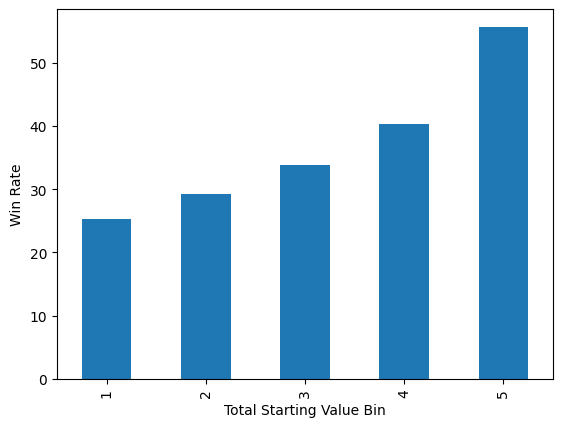

In [28]:
result.plot.bar(x="value", y="win%", ylabel='Win Rate', xlabel= 'Total Starting Value Bin')

The results of binning starting value show that teams with higher starting value tend to have better win percentages

Results are investigated for home teams only to see if there is an advantage/disadvantage to playing at home when it comes to match result

In [29]:
#Anaysis by W,D,L at home games
wins = data['outcome'].value_counts()[2]
draws = data['outcome'].value_counts()[1]
losses = data['outcome'].value_counts()[0]

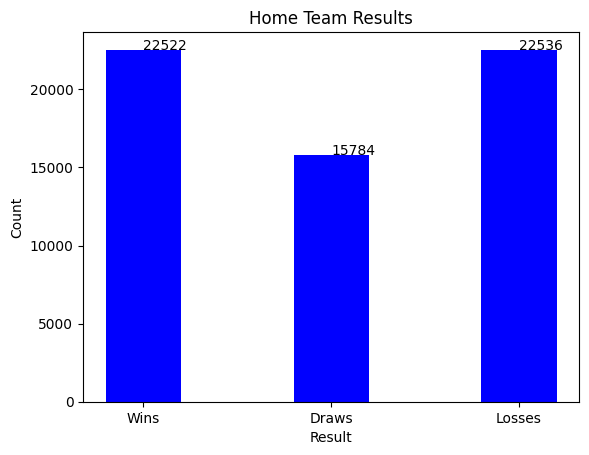

In [30]:
import matplotlib.pyplot as plt
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
data2 = {'Wins': wins, 'Draws': draws, 'Losses': losses}
results = list(data2.keys())
figures = list(data2.values())
plt.bar(results, figures, color ='blue',width = 0.4)
addlabels(results, figures)
plt.xlabel("Result")
plt.ylabel("Count")
plt.title("Home Team Results")
plt.show()

The graph above shows that teams are just as likely to lose as win when playing at home. A drawn game is least likely.

In [33]:
fe_data = data
fe_data.to_csv('FE_Data.csv')